In [ ]:
# This is for testing for hysteresis and slop using frames
# with thermal pinhole images

# created 2019 June 23 by E.S.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import gc
from astropy.io import fits
import pandas as pd
import glob
import photutils
from photutils import DAOStarFinder
%matplotlib inline
#%matplotlib qt

In [2]:
stem = "/Volumes/seagate_external_drive/lbti_data_reduction/hysteresis_slop/"

In [3]:
def make_median(date_string, start_frame_num, save_name):
    '''
    Make median of five frames, starting with the one with the starting frame number
    '''
    
    # initialize cube
    frame_cube = np.nan*np.ones((5,2048,2048))
    
    for t in range(0,5):
            
        # read in image
        sciImg, header = fits.getdata(stem + "lm_"+date_string+"_"+
                                      '%06i'%(start_frame_num+t)+".fits",
                                      0,header=True)

        # take second slice
        frame_cube[t,:,:] = sciImg[1,:,:]
    
        # take median
        median_frame_cube = np.median(frame_cube, axis = 0).astype(np.uint16)

    hdu = fits.PrimaryHDU(median_frame_cube)
    hdulist = fits.HDUList([hdu])
    hdu.writeto(save_name, overwrite=True)

In [4]:
def make_median_dark_subt(date_string, start_frame_num, save_name):
    '''
    Same as above, but with dark subtraction added in
    '''
    
    # initialize cube
    frame_cube = np.nan*np.ones((5,2048,2048))
    
    for t in range(0,5):
            
        # read in image
        sciImg, header = fits.getdata(stem + "lm_"+date_string+"_"+
                                      '%06i'%(start_frame_num+t)+".fits",
                                      0,header=True)

        # take second slice
        frame_cube[t,:,:] = sciImg[1,:,:]
    
        # take median
        median_frame_cube = np.median(frame_cube, axis = 0).astype(np.uint16)
        
        # dark-subtract
        dark, header = fits.getdata("med_dark.fits",
                                      0,header=True)
        
    frame_dark_subt = np.subtract(median_frame_cube,dark)

    hdu = fits.PrimaryHDU(frame_dark_subt)
    hdulist = fits.HDUList([hdu])
    hdu.writeto(save_name, overwrite=True)

In [7]:
#make_median("190217", 11, "med_dark.fits")
make_median_dark_subt("190217", 16, "med_016_020.fits")
make_median_dark_subt("190217", 21, "med_021_025.fits")
make_median_dark_subt("190217", 26, "med_026_030.fits")
make_median_dark_subt("190217", 31, "med_031_035.fits")
make_median_dark_subt("190217", 36, "med_036_040.fits")
make_median_dark_subt("190217", 41, "med_041_045.fits")
make_median_dark_subt("190217", 46, "med_046_050.fits")

In [8]:
make_median_dark_subt("190218", 6, "med_190218_006_010.fits")
make_median_dark_subt("190218", 11, "med_190218_011_015.fits")
make_median_dark_subt("190218", 16, "med_190218_016_020.fits")
make_median_dark_subt("190218", 21, "med_190218_021_025.fits")
make_median_dark_subt("190218", 26, "med_190218_026_030.fits")
make_median_dark_subt("190218", 31, "med_190218_031_035.fits")
make_median_dark_subt("190218", 36, "med_190218_036_040.fits")
make_median_dark_subt("190218", 41, "med_190218_041_045.fits")
make_median_dark_subt("190218", 46, "med_190218_046_050.fits")
make_median_dark_subt("190218", 51, "med_190218_051_055.fits")
make_median_dark_subt("190218", 56, "med_190218_056_060.fits")
make_median_dark_subt("190218", 61, "med_190218_061_065.fits")
make_median_dark_subt("190218", 66, "med_190218_066_070.fits")
make_median_dark_subt("190218", 71, "med_190218_071_075.fits")
make_median_dark_subt("190218", 76, "med_190218_076_080.fits")
make_median_dark_subt("190218", 81, "med_190218_081_085.fits")
make_median_dark_subt("190218", 86, "med_190218_086_090.fits")
make_median_dark_subt("190218", 91, "med_190218_091_095.fits")
make_median_dark_subt("190218", 96, "med_190218_096_100.fits")
make_median_dark_subt("190218", 101, "med_190218_101_105.fits")
make_median_dark_subt("190218", 106, "med_190218_106_110.fits")
make_median_dark_subt("190218", 111, "med_190218_111_115.fits")
make_median_dark_subt("190218", 116, "med_190218_116_120.fits")
make_median_dark_subt("190218", 121, "med_190218_121_125.fits")

In [54]:
def centroid_psf(file_name, mask=False):
    '''
    Read in an image and get a precise center of the PSF
    '''
    
    plt.clf()
    
    # read in image
    sciImg, header = fits.getdata(file_name,0,header=True)
    
    daofind = DAOStarFinder(fwhm=30, threshold=150, exclude_border=True)
    
    # mask rest of image
    if mask:
        piece_to_keep_top = sciImg[1095:1180,1518:1614]
        piece_to_keep_bottom = sciImg[619:700,1393:1492]
        sciImg = np.median(sciImg)*np.ones(np.shape(sciImg))
        sciImg[1095:1180,1518:1614] = piece_to_keep_top
        sciImg[619:700,1393:1492] = piece_to_keep_bottom   
        
    # kludge for 1 pixel
    sciImg[1135,1567] = sciImg[1135,1566]
    
    sources = daofind(sciImg)
    
    plt.imshow(sciImg, origin="lower")
    plt.scatter([sources["xcentroid"]],[sources["ycentroid"]])
    plt.show()
    
    print(sources)

In [12]:
centroid_psf("med_016_020.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.61106461 673.060660987 ... 183.0 1.44518064687  -0.399805342709
  2 1557.66587106 1135.60270615 ... 192.0 1.08311592458 -0.0866873528097


In [13]:
centroid_psf("med_021_025.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.43453672  670.14133892 ... 182.0 1.59971679531  -0.51010776114
  2 1562.78755879 1134.99355864 ... 194.0 1.11003485226 -0.113341536843


In [14]:
centroid_psf("med_026_030.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.44280197   669.0143762 ... 186.0  1.6528667337 -0.545594597399
  2 1568.52076201 1134.83130217 ... 190.0 1.10147299002 -0.104934629954


In [15]:
centroid_psf("med_031_035.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.20903091  667.66081717 ... 188.0 1.70908029866  -0.581906169744
  2 1575.71835279 1134.21268847 ... 191.0  1.0881129479 -0.0916849454491


In [16]:
centroid_psf("med_036_040.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.25644211 667.642581035 ... 183.0 1.72578532962 -0.592466932159
  2 1571.79233546 1133.90616122 ... 190.0 1.09408814917 -0.097630784787


In [17]:
centroid_psf("med_041_045.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.55230489 667.199841294 ... 183.0 1.72898360429 -0.594477187346
  2 1567.45849122 1133.74092645 ... 190.0 1.13239242936 -0.134992393037


In [18]:
centroid_psf("med_046_050.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.56663814 666.291696191 ... 186.0 1.73544165717  -0.598525044881
  2 1562.59274538 1133.36879173 ... 191.0 1.08995057592 -0.0935170129941


In [19]:
centroid_psf("med_190218_006_010.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.65971114 665.737573041 ... 181.0 1.77401936806  -0.622395892454
  2 1562.08949482 1138.25411073 ... 190.0 1.07345615313 -0.0769607743706


In [20]:
centroid_psf("med_190218_011_015.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1 1442.62443566 665.298793384 ... 188.0 1.77675446721  -0.624068540104
  2 1561.76388787 1143.69346422 ... 190.0 1.06615581073 -0.0695516955801


In [21]:
centroid_psf("med_190218_016_020.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux            mag        
--- ------------- ------------- ... ----- ------------- ------------------
  1 1442.72449823 664.907066567 ... 186.0  1.7906694888     -0.63253858434
  2 1561.36606657 1150.84746493 ... 192.0 1.00003013983 -3.27234089906e-05


In [25]:
centroid_psf("med_190218_021_025.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag       
--- ------------- ------------- ... ----- ------------- ----------------
  1  1442.5668857 664.600855583 ... 190.0 1.95685258315  -0.728895274753
  2 1561.39267268  1147.6013748 ... 190.0   1.043880546 -0.0466270101194


In [26]:
centroid_psf("med_190218_026_030.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.61019653 664.356085829 ... 189.0 1.96969211826   -0.7359958677
  2 1561.60353536 1142.47336763 ... 191.0  1.1206968452 -0.123720373456


In [27]:
centroid_psf("med_190218_031_035.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1442.49238854 664.010562767 ... 189.0 1.97813247925 -0.740638434381
  2 1561.55022534 1137.83979398 ... 191.0 1.16876784935 -0.169320641127


In [28]:
centroid_psf("med_190218_036_040.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1469.47511727 659.425468574 ... 184.0 1.59812048721 -0.509023797516
  2 1561.06948313 1137.44422162 ... 192.0 1.15575082985 -0.157160534854


In [29]:
centroid_psf("med_190218_041_045.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1449.19735495 659.569348795 ... 186.0 2.10497212409  -0.80811587224
  2 1561.00952415 1137.42924744 ... 192.0 1.17658361696 -0.176556992178


In [30]:
centroid_psf("med_190218_046_050.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1  1449.0130285 654.314716138 ... 188.0 2.04220634672 -0.775249053872
  2 1561.07581152 1137.26372619 ... 191.0 1.16917641496 -0.169700115081


In [31]:
centroid_psf("med_190218_051_055.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1  1448.5298193 658.666255349 ... 187.0 2.13868494531 -0.825367030864
  2 1561.11247591 1137.06071298 ... 194.0 1.15218220388 -0.153802907536


In [32]:
centroid_psf("med_190218_056_060.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.43748306 658.474184952 ... 187.0  2.1046024213 -0.807925164271
  2 1560.87766417  1137.1804002 ... 195.0 1.16708727413  -0.16775833389


In [33]:
centroid_psf("med_190218_061_065.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.57759423 658.382283421 ... 185.0 2.09717205457 -0.804085154947
  2 1560.79691565 1136.96595144 ... 197.0 1.16264106971 -0.163614150312


In [34]:
centroid_psf("med_190218_066_070.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.13624498 658.129367144 ... 185.0 2.11267360442 -0.812081015762
  2 1560.65362422 1136.88188001 ... 192.0 1.16523010161 -0.166029238276


In [35]:
centroid_psf("med_190218_071_075.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1448.02512107 658.089196075 ... 185.0 2.09080928215 -0.800786048704
  2 1560.62359559 1136.98886772 ... 192.0 1.14778339149  -0.14964984046


In [56]:
centroid_psf("med_190218_076_080.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.53503508 657.317302084 ... 184.0 2.68502365666  -1.07237029111
  2 1564.87208182 1136.56457417 ... 192.0 1.64180842794 -0.538306201781


In [57]:
centroid_psf("med_190218_081_085.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.52415548 657.145975123 ... 186.0 2.68631539544  -1.07289250264
  2 1565.48331153 1136.54212592 ... 194.0 1.59976221224 -0.510138585414


In [58]:
centroid_psf("med_190218_086_090.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.42993817 657.045795585 ... 185.0 2.68035730994  -1.07048173077
  2 1565.93015338 1136.67274415 ... 194.0 1.63948090893 -0.536765909643


In [59]:
centroid_psf("med_190218_091_095.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.37313611  656.96419936 ... 185.0 2.69056957316  -1.07461056645
  2 1565.61094604 1136.53699295 ... 193.0 1.65084636796 -0.544266646437


In [60]:
centroid_psf("med_190218_096_100.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.33345175 656.882605983 ... 188.0 2.66609993793  -1.06469106194
  2 1565.73654244 1136.90021495 ... 195.0 1.64519572862 -0.540543933228


In [61]:
centroid_psf("med_190218_101_105.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.33982103 656.886723916 ... 183.0 2.64757824253  -1.05712200863
  2 1565.62470804 1137.22342468 ... 192.0 1.63091205223 -0.531076355296


In [62]:
centroid_psf("med_190218_106_110.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1447.34835743   656.7425267 ... 185.0 2.64389842462  -1.05561191517
  2 1565.76978036 1136.49068614 ... 194.0 1.64773989445 -0.542221642006


In [63]:
centroid_psf("med_190218_111_115.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1  1461.8564016 658.909854484 ... 194.0 2.86127082862  -1.14139741785
  2 1566.19925113  1136.2549627 ... 195.0 1.62132093797 -0.524672478196


In [64]:
centroid_psf("med_190218_116_120.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux           mag      
--- ------------- ------------- ... ----- ------------- ---------------
  1 1475.19254673 660.867380114 ... 190.0 3.46410891917  -1.34897884682
  2 1566.09749614 1136.22051073 ... 193.0 1.62335078134 -0.526030935946


In [65]:
centroid_psf("med_190218_121_125.fits", mask = True)

 id   xcentroid     ycentroid   ...  peak      flux          mag     
--- ------------- ------------- ... ----- ------------- -------------
  1  1446.9324243 656.392151663 ... 185.0 2.57539472984 -1.0271095066
  2 1566.20851295 1136.16006459 ... 193.0 1.66643096656 -0.5544683183


# Read in csv file of centroid data

In [19]:
# set plate scale

PS = 10.7 # mas/pix

In [5]:
# hysteresis test 1

hysteresis_test = pd.read_csv("hysteresis_test_190218.csv", 
                              dtype={"frame_ref": np.int, "img_name": str, 
                                     "x1": np.float64, "y1": np.float64,
                                     "x2": np.float64, "y2": np.float64, 
                                     "remarks": str})
# include mas equivalents to pixels
hysteresis_test["mas_x1"] = PS*hysteresis_test["x1"]
hysteresis_test["mas_y1"] = PS*hysteresis_test["y1"]
hysteresis_test["mas_x2"] = PS*hysteresis_test["x2"]
hysteresis_test["mas_y2"] = PS*hysteresis_test["y2"]

In [25]:
# hysteresis test 2

# placeholder values here
hysteresis_test_2 = hysteresis_test.copy()
'''
hysteresis_test_2 = pd.read_csv("hysteresis_test_(TBD).csv", 
                              dtype={"frame_ref": np.int, "img_name": str, 
                                     "x1": np.float64, "y1": np.float64,
                                     "x2": np.float64, "y2": np.float64, 
                                     "remarks": str})
# include mas equivalents to pixels
PS = 10.7 # mas/pix
hysteresis_test["mas_x1"] = PS*hysteresis_test["x1"]
hysteresis_test["mas_y1"] = PS*hysteresis_test["y1"]
hysteresis_test["mas_x2"] = PS*hysteresis_test["x2"]
hysteresis_test["mas_y2"] = PS*hysteresis_test["y2"]
'''

'\nhysteresis_test_2 = pd.read_csv("hysteresis_test_(TBD).csv", \n                              dtype={"frame_ref": np.int, "img_name": str, \n                                     "x1": np.float64, "y1": np.float64,\n                                     "x2": np.float64, "y2": np.float64, \n                                     "remarks": str})\n# include mas equivalents to pixels\nPS = 10.7 # mas/pix\nhysteresis_test["mas_x1"] = PS*hysteresis_test["x1"]\nhysteresis_test["mas_y1"] = PS*hysteresis_test["y1"]\nhysteresis_test["mas_x2"] = PS*hysteresis_test["x2"]\nhysteresis_test["mas_y2"] = PS*hysteresis_test["y2"]\n'

In [26]:
hysteresis_test_2

,frame_ref,img_name,x1,y1,x2,y2,remarks,mas_x1,mas_y1,mas_x2,mas_y2
0,0,med_016_020.fits,1442.611065,673.060661,1557.665871,1135.602706,baseline,15435.938391,7201.749073,16667.024820,12150.948956
1,1,med_021_025.fits,1442.434537,670.141339,1562.787559,1134.993559,"FPC (top PSF) tilted to the right by 0.10"" ase...",15434.049543,7170.512326,16721.826879,12144.431077
2,2,med_026_030.fits,1442.442802,669.014376,1568.520762,1134.831302,another step like the above,15434.137981,7158.453825,16783.172154,12142.694933
3,3,med_031_035.fits,1442.209031,667.660817,1575.718353,1134.212688,another step like the above,15431.636631,7143.970744,16860.186375,12136.075767
4,4,med_036_040.fits,1442.256442,667.642581,1571.792335,1133.906161,"FPC (top PSF) tilted to the left by 0.10"" asec...",15432.143931,7143.775617,16818.177989,12132.795925
5,5,med_041_045.fits,1442.552305,667.199841,1567.458491,1133.740926,another step like the above,15435.309662,7139.038302,16771.805856,12131.027913
6,6,med_046_050.fits,1442.566638,666.291696,1562.592745,1133.368792,another step like the above (should be at star...,15435.463028,7129.321149,16719.742376,12127.046072
7,7,med_190218_006_010.fits,1442.659711,665.737573,1562.089495,1138.254111,"FPC (top PSF) tipped up by 0.10"" asec (i.e. +0...",15436.458909,7123.392032,16714.357595,12179.318985
8,8,med_190218_011_015.fits,1442.624436,665.298793,1561.763888,1143.693464,another step like the above,15436.081462,7118.697089,16710.873600,12237.520067
9,9,med_190218_016_020.fits,1442.724498,664.907067,1561.366067,1150.847465,another step like the above,15437.152131,7114.505612,16706.616912,12314.067875


In [7]:
hysteresis_test["x2"]

0     1557.665871
1     1562.787559
2     1568.520762
3     1575.718353
4     1571.792335
5     1567.458491
6     1562.592745
7     1562.089495
8     1561.763888
9     1561.366067
10    1561.392673
11    1561.603535
12    1561.550225
13    1561.069483
14    1561.009524
15    1561.075812
16    1561.112476
17    1560.877664
18    1560.796916
19    1560.653624
20    1560.623596
21    1564.872082
22    1565.483312
23    1565.930153
24    1565.610946
25    1565.736542
26    1565.624708
27    1565.769780
28    1566.199251
29    1566.097496
30    1566.208513
Name: x2, dtype: float64

# FPC movement tests

In [128]:
masec_per_rad = np.divide(180*3600*1000,np.pi)

# lambda/D (across 8.25 m mirror)
lambda_D_1pt5 = np.divide(1.5e-6,8.25)*masec_per_rad
lambda_D_5 = np.divide(5e-6,8.25)*masec_per_rad
lambda_D_8 = np.divide(8e-6,8.25)*masec_per_rad
lambda_D_14 = np.divide(14e-6,8.25)*masec_per_rad

# lambda/Bcc (across 14.4 m)
lambda_Bcc_1pt5 = np.divide(1.5e-6,14.4)*masec_per_rad
lambda_Bcc_5 = np.divide(5e-6,14.4)*masec_per_rad
lambda_Bcc_8 = np.divide(8e-6,14.4)*masec_per_rad
lambda_Bcc_14 = np.divide(14e-6,14.4)*masec_per_rad

# lambda/Bee (across 22.7  m)
lambda_Bee_1pt5 = np.divide(1.5e-6,22.7)*masec_per_rad
lambda_Bee_5 = np.divide(5e-6,22.7)*masec_per_rad
lambda_Bee_8 = np.divide(8e-6,22.7)*masec_per_rad
lambda_Bee_14 = np.divide(14e-6,22.7)*masec_per_rad

# This is just one plot; don't put this plot into SPIE article

<Figure size 432x288 with 0 Axes>

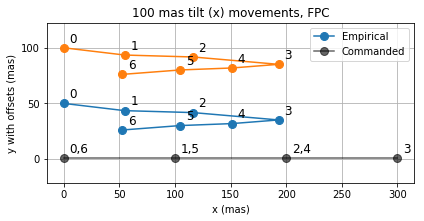

In [48]:
# plot one test

plt.clf()
plt.figure(figsize=(6,3))

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][0:7],
                                  hysteresis_test["mas_x2"][0]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][0:7],
                                  hysteresis_test["mas_y2"][0]).values
mas_y2_rel_baseline_offset = np.add(mas_y2_rel_baseline,50)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][0:7],
                                  hysteresis_test_2["mas_x2"][0]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][0:7],
                                  hysteresis_test_2["mas_y2"][0]).values
mas_y2_rel_baseline_offset_2 = np.add(mas_y2_rel_baseline_2,100)

text_array_emp = [0,1,2,3,4,5,6]

# commanded
mas_x2_rel_expected = [0,100,200,300]
mas_y2_rel_expected = np.ones(4)
text_array_expect = ["0,6","1,5","2,4","3"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline, mas_y2_rel_baseline_offset, '-o', 
         markersize = 8, alpha = 1, label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_2, mas_y2_rel_baseline_offset_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline[i]+5, mas_y2_rel_baseline_offset[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_2[i]+5, mas_y2_rel_baseline_offset_2[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected[i]+5, mas_y2_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12)

major_ticks = np.arange(-200, 401, 50)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-10,350])
plt.ylim([-10,150])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x (mas)")
plt.ylabel("y with offsets (mas)")
plt.tight_layout()
plt.legend()
plt.title("100 mas tilt (x) movements, FPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

# This is just one plot; don't put this plot into SPIE article

<Figure size 432x288 with 0 Axes>

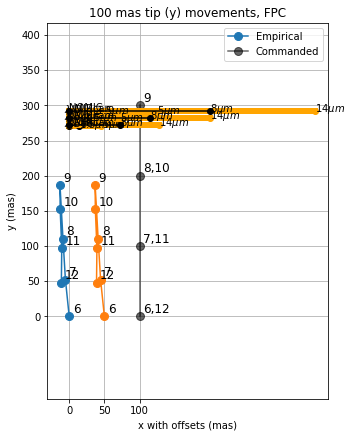

In [161]:
# plot one test

plt.clf()
plt.figure(figsize=(5,6))

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][6:13],
                                  hysteresis_test["mas_x2"][6]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][6:13],
                                  hysteresis_test["mas_y2"][6]).values
mas_x2_rel_baseline_offset = np.add(mas_x2_rel_baseline,0)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][6:13],
                                  hysteresis_test_2["mas_x2"][6]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][6:13],
                                  hysteresis_test_2["mas_y2"][6]).values
mas_x2_rel_baseline_offset_2 = np.add(mas_x2_rel_baseline_2,50)

text_array_emp = [6,7,8,9,10,11,12]

# commanded
mas_x2_rel_expected = 100*np.ones(4)
mas_y2_rel_expected = [0,100,200,300]
text_array_expect = ["6,12","7,11","8,10","9"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_offset, mas_y2_rel_baseline, '-o', 
         markersize = 8, alpha = 1, label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_offset_2, mas_y2_rel_baseline_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_offset[i]+5, mas_y2_rel_baseline[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_offset_2[i]+5, mas_y2_rel_baseline_2[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected[i]+5, mas_y2_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12)

    
### plot bars for scale

## lambda/D
plt.text(-7,290,
         "$\lambda/D$", color="k")
# LMIR wavelengths
plt.text(0,290.5,
         "LMIRcam", color="k")
plt.text(lambda_D_1pt5,288.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_D_5,288.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,292.5,
         "NOMIC", color="k")
plt.text(lambda_D_8,290.5,
         "8$\mu m$", color="k")
plt.text(lambda_D_14,290.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_D_5],[290,290],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_D_1pt5],[290,290],'o-',color="k")
plt.plot([0,lambda_D_14],[292,292],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_D_8],[292,292],'o-',color="k")

## lambda/Bcc
plt.text(-7,280,
         "$\lambda/Bcc$", color="k")
# LMIR wavelengths
plt.text(0,280.5,
         "LMIRcam", color="k")
plt.text(lambda_Bcc_1pt5,278.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_Bcc_5,278.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,282.5,
         "NOMIC", color="k")
plt.text(lambda_Bcc_8,280.5,
         "8$\mu m$", color="k")
plt.text(lambda_Bcc_14,280.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_Bcc_5],[280,280],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bcc_1pt5],[280,280],'o-',color="k")
plt.plot([0,lambda_Bcc_14],[282,282],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bcc_8],[282,282],'o-',color="k")

## lambda/Bee
plt.text(-7,270,
         "$\lambda/Bee$", color="k")
# LMIR wavelengths
plt.text(0,270.5,
         "LMIRcam", color="k")
plt.text(lambda_Bee_1pt5,268.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_Bee_5+1,268.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,272.5,
         "NOMIC", color="k")
plt.text(lambda_Bee_8,270.5,
         "8$\mu m$", color="k")
plt.text(lambda_Bee_14,270.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_Bee_5],[270,270],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bee_1pt5],[270,270],'o-',color="k")
plt.plot([0,lambda_Bee_14],[272,272],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bee_8],[272,272],'o-',color="k")
    

    
major_ticks_x = np.arange(0, 101, 50)  
major_ticks_y = np.arange(0, 401, 50) 
plt.xticks(major_ticks_x)                                                       
plt.yticks(major_ticks_y) 
plt.xlim([-50,150])
plt.ylim([-20,350])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.legend()
plt.tight_layout()
plt.title("100 mas tip (y) movements, FPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

# Put this plot into SPIE article

<Figure size 432x288 with 0 Axes>

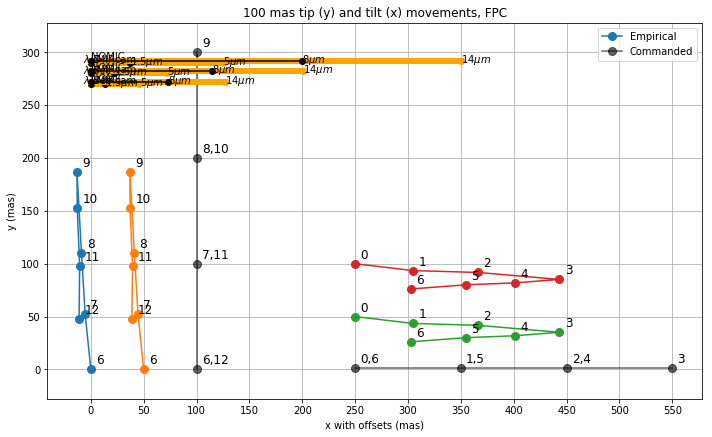

In [171]:
# plot two tests

plt.clf()
plt.figure(figsize=(10,6))

########################################################################
# TIP (y)

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][6:13],
                                  hysteresis_test["mas_x2"][6]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][6:13],
                                  hysteresis_test["mas_y2"][6]).values
mas_x2_rel_baseline_offset = np.add(mas_x2_rel_baseline,0)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][6:13],
                                  hysteresis_test_2["mas_x2"][6]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][6:13],
                                  hysteresis_test_2["mas_y2"][6]).values
mas_x2_rel_baseline_offset_2 = np.add(mas_x2_rel_baseline_2,50)

text_array_emp = [6,7,8,9,10,11,12]

# commanded
mas_x2_rel_expected = 100*np.ones(4)
mas_y2_rel_expected = [0,100,200,300]
text_array_expect = ["6,12","7,11","8,10","9"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_offset, mas_y2_rel_baseline, '-o', 
         markersize = 8, alpha = 1, label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_offset_2, mas_y2_rel_baseline_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_offset[i]+5, mas_y2_rel_baseline[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_offset_2[i]+5, mas_y2_rel_baseline_2[i]+5,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected[i]+5, mas_y2_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12)

    
    
########################################################################
# TILT (x)

# empirical test, 1
mas_x2_rel_baseline_tilt = np.subtract(hysteresis_test["mas_x2"][0:7],
                                  hysteresis_test["mas_x2"][0]).values
mas_y2_rel_baseline_tilt = np.subtract(hysteresis_test["mas_y2"][0:7],
                                  hysteresis_test["mas_y2"][0]).values
mas_y2_rel_baseline_tilt_offset = np.add(mas_y2_rel_baseline_tilt,50)

# empirical test, 2
mas_x2_rel_baseline_tilt_2 = np.subtract(hysteresis_test_2["mas_x2"][0:7],
                                  hysteresis_test_2["mas_x2"][0]).values
mas_y2_rel_baseline_tilt_2 = np.subtract(hysteresis_test_2["mas_y2"][0:7],
                                  hysteresis_test_2["mas_y2"][0]).values
mas_y2_rel_baseline_tilt_offset_2 = np.add(mas_y2_rel_baseline_tilt_2,100)

text_array_emp_tilt = [0,1,2,3,4,5,6]

# commanded
mas_x2_rel_expected_tilt = [0,100,200,300]
mas_y2_rel_expected_tilt = np.ones(4)
text_array_expect_tilt = ["0,6","1,5","2,4","3"]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_tilt+250, mas_y2_rel_baseline_tilt_offset, '-o', 
         markersize = 8, alpha = 1)

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_tilt_2+250, mas_y2_rel_baseline_tilt_offset_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(np.add(mas_x2_rel_expected_tilt,250), mas_y2_rel_expected_tilt, '-o', 
         markersize = 8, color="k", alpha = 0.6)

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_tilt[i]+255, mas_y2_rel_baseline_tilt_offset[i]+5,
             str(text_array_emp_tilt[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_tilt_2[i]+255, mas_y2_rel_baseline_tilt_offset_2[i]+5,
             str(text_array_emp_tilt[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,4):
    plt.text(mas_x2_rel_expected_tilt[i]+255, mas_y2_rel_expected_tilt[i]+5,
             str(text_array_expect_tilt[i]), color="k", fontsize=12)


########################################################################  
### plot bars for scale

## lambda/D
plt.text(-7,290,
         "$\lambda/D$", color="k")
# LMIR wavelengths
plt.text(0,290.5,
         "LMIRcam", color="k")
plt.text(lambda_D_1pt5,288.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_D_5,288.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,292.5,
         "NOMIC", color="k")
plt.text(lambda_D_8,290.5,
         "8$\mu m$", color="k")
plt.text(lambda_D_14,290.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_D_5],[290,290],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_D_1pt5],[290,290],'o-',color="k")
plt.plot([0,lambda_D_14],[292,292],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_D_8],[292,292],'o-',color="k")

## lambda/Bcc
plt.text(-7,280,
         "$\lambda/Bcc$", color="k")
# LMIR wavelengths
plt.text(0,280.5,
         "LMIRcam", color="k")
plt.text(lambda_Bcc_1pt5,278.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_Bcc_5,278.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,282.5,
         "NOMIC", color="k")
plt.text(lambda_Bcc_8,280.5,
         "8$\mu m$", color="k")
plt.text(lambda_Bcc_14,280.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_Bcc_5],[280,280],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bcc_1pt5],[280,280],'o-',color="k")
plt.plot([0,lambda_Bcc_14],[282,282],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bcc_8],[282,282],'o-',color="k")

## lambda/Bee
plt.text(-7,270,
         "$\lambda/Bee$", color="k")
# LMIR wavelengths
plt.text(0,270.5,
         "LMIRcam", color="k")
plt.text(lambda_Bee_1pt5,268.5,
         "1.5$\mu m$", color="k")
plt.text(lambda_Bee_5+1,268.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,272.5,
         "NOMIC", color="k")
plt.text(lambda_Bee_8,270.5,
         "8$\mu m$", color="k")
plt.text(lambda_Bee_14,270.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,lambda_Bee_5],[270,270],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bee_1pt5],[270,270],'o-',color="k")
plt.plot([0,lambda_Bee_14],[272,272],'o-',linewidth=6,color="orange")
plt.plot([0,lambda_Bee_8],[272,272],'o-',color="k")
    

    
major_ticks_x = np.arange(0, 601, 50)  
major_ticks_y = np.arange(0, 401, 50) 
plt.xticks(major_ticks_x)                                                       
plt.yticks(major_ticks_y) 
plt.xlim([-50,650])
plt.ylim([-20,350])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.legend()
plt.tight_layout()
plt.title("100 mas tip (y) and tilt (x) movements, FPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

# Put this plot into SPIE article

<Figure size 432x288 with 0 Axes>

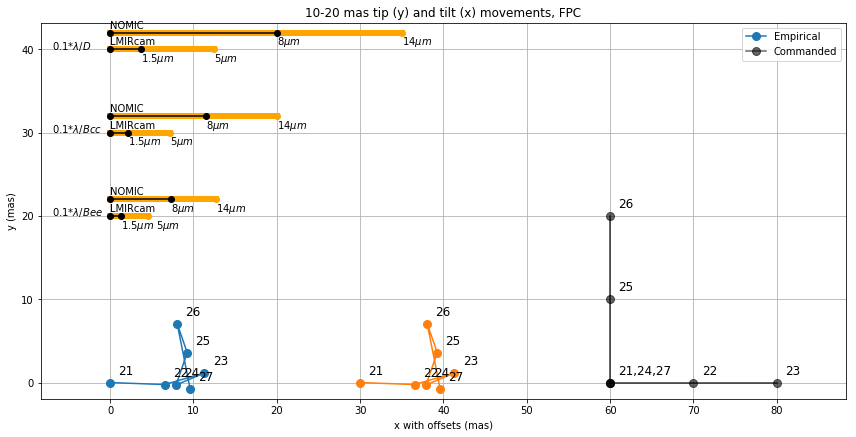

In [175]:
# plot one test

plt.clf()
plt.figure(figsize=(12,6))

# empirical test, 1
mas_x2_rel_baseline = np.subtract(hysteresis_test["mas_x2"][21:28],
                                  hysteresis_test["mas_x2"][21]).values
mas_y2_rel_baseline = np.subtract(hysteresis_test["mas_y2"][21:28],
                                  hysteresis_test["mas_y2"][21]).values
mas_x2_rel_baseline_offset = np.add(mas_x2_rel_baseline,0)

# empirical test, 2
mas_x2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_x2"][21:28],
                                  hysteresis_test_2["mas_x2"][21]).values
mas_y2_rel_baseline_2 = np.subtract(hysteresis_test_2["mas_y2"][21:28],
                                  hysteresis_test_2["mas_y2"][21]).values
mas_x2_rel_baseline_offset_2 = np.add(mas_x2_rel_baseline_2,30)

text_array_emp = [21,22,23,24,25,26,27]

# commanded
mas_x2_rel_expected = np.add(60,[0,10,20,0,0,0,0])
mas_y2_rel_expected = [0,0,0,0,10,20,0]
text_array_expect = ["21,24,27","22","23","","25","26",""]

# plot empirical points, 1
plt.plot(mas_x2_rel_baseline_offset, mas_y2_rel_baseline, '-o', 
         markersize = 8, alpha = 1, label="Empirical")

# plot empirical points, 2
plt.plot(mas_x2_rel_baseline_offset_2, mas_y2_rel_baseline_2, '-o', 
         markersize = 8, alpha = 1)

# plot commanded points
plt.plot(mas_x2_rel_expected, mas_y2_rel_expected, '-o', 
         markersize = 8, color="k", alpha = 0.6, label="Commanded")

# plot annotation, empirical 1 and 2
for i in range(0,7):
    plt.text(mas_x2_rel_baseline_offset[i]+1, mas_y2_rel_baseline[i]+1,
             str(text_array_emp[i]), color="k", fontsize=12)
    plt.text(mas_x2_rel_baseline_offset_2[i]+1, mas_y2_rel_baseline_2[i]+1,
             str(text_array_emp[i]), color="k", fontsize=12)

# plot annotation, commanded
for i in range(0,7):
    plt.text(mas_x2_rel_expected[i]+1, mas_y2_rel_expected[i]+1,
             str(text_array_expect[i]), color="k", fontsize=12)
    

### plot bars for scale

## lambda/D
plt.text(-7,40,
         "0.1*$\lambda/D$", color="k")
# LMIR wavelengths
plt.text(0,40.5,
         "LMIRcam", color="k")
plt.text(0.1*lambda_D_1pt5,38.5,
         "1.5$\mu m$", color="k")
plt.text(0.1*lambda_D_5,38.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,42.5,
         "NOMIC", color="k")
plt.text(0.1*lambda_D_8,40.5,
         "8$\mu m$", color="k")
plt.text(0.1*lambda_D_14,40.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,0.1*lambda_D_5],[40,40],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_D_1pt5],[40,40],'o-',color="k")
plt.plot([0,0.1*lambda_D_14],[42,42],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_D_8],[42,42],'o-',color="k")

## lambda/Bcc
plt.text(-7,30,
         "0.1*$\lambda/Bcc$", color="k")
# LMIR wavelengths
plt.text(0,30.5,
         "LMIRcam", color="k")
plt.text(0.1*lambda_Bcc_1pt5,28.5,
         "1.5$\mu m$", color="k")
plt.text(0.1*lambda_Bcc_5,28.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,32.5,
         "NOMIC", color="k")
plt.text(0.1*lambda_Bcc_8,30.5,
         "8$\mu m$", color="k")
plt.text(0.1*lambda_Bcc_14,30.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,0.1*lambda_Bcc_5],[30,30],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bcc_1pt5],[30,30],'o-',color="k")
plt.plot([0,0.1*lambda_Bcc_14],[32,32],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bcc_8],[32,32],'o-',color="k")

## lambda/Bee
plt.text(-7,20,
         "0.1*$\lambda/Bee$", color="k")
# LMIR wavelengths
plt.text(0,20.5,
         "LMIRcam", color="k")
plt.text(0.1*lambda_Bee_1pt5,18.5,
         "1.5$\mu m$", color="k")
plt.text(0.1*lambda_Bee_5+1,18.5,
         "5$\mu m$", color="k")
# NOMIC wavelengths
plt.text(0,22.5,
         "NOMIC", color="k")
plt.text(0.1*lambda_Bee_8,20.5,
         "8$\mu m$", color="k")
plt.text(0.1*lambda_Bee_14,20.5,
         "14$\mu m$", color="k")
# lines
plt.plot([0,0.1*lambda_Bee_5],[20,20],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bee_1pt5],[20,20],'o-',color="k")
plt.plot([0,0.1*lambda_Bee_14],[22,22],'o-',linewidth=6,color="orange")
plt.plot([0,0.1*lambda_Bee_8],[22,22],'o-',color="k")



major_ticks_x = np.arange(0, 101, 10) 
major_ticks_y = np.arange(0, 401, 10)
plt.xticks(major_ticks_x)                                                     
plt.yticks(major_ticks_y) 
plt.xlim([-20,100])
plt.ylim([-10,30])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x with offsets (mas)")
plt.ylabel("y (mas)")
plt.legend()
plt.tight_layout()
plt.title("10-20 mas tip (y) and tilt (x) movements, FPC")
plt.show()

# SPC movement tests

<Figure size 432x288 with 0 Axes>

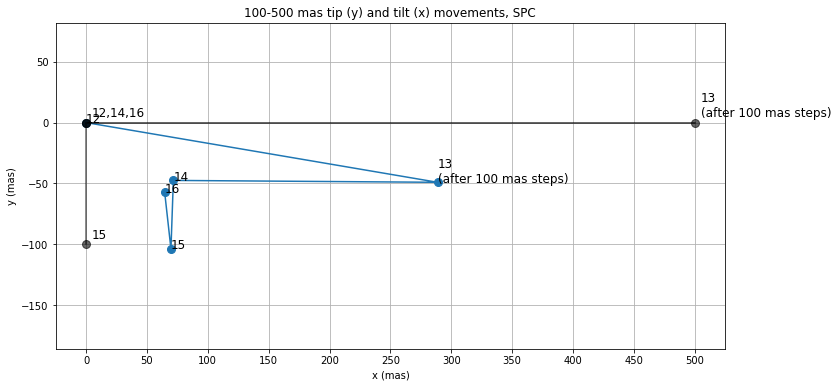

In [183]:
# plot one test: active movement

plt.clf()
plt.figure(figsize=(12,6))

mas_x1_rel_baseline = np.subtract(hysteresis_test["mas_x1"][12:17],
                                  hysteresis_test["mas_x1"][12]).values
mas_y1_rel_baseline = np.subtract(hysteresis_test["mas_y1"][12:17],
                                  hysteresis_test["mas_y1"][12]).values

mas_x1_rel_expected = [0,500,0,0]
mas_y1_rel_expected = [0,0,0,-100]

text_array_emp = ["12","13\n(after 100 mas steps)","14","15","16"]
text_array_expect = ["12,14,16","13\n(after 100 mas steps)","","15"]
plt.plot(mas_x1_rel_baseline, mas_y1_rel_baseline, '-o', markersize = 8, alpha = 1)
plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, 
         color="k", alpha = 0.6)
for i in range(0,5):
    plt.text(mas_x1_rel_baseline[i], mas_y1_rel_baseline[i],
             str(text_array_emp[i]), color="k", fontsize=12)
for i in range(0,4):
    plt.text(mas_x1_rel_expected[i]+5, mas_y1_rel_expected[i]+5,
             str(text_array_expect[i]), color="k", fontsize=12, alpha = 1)
major_ticks = np.arange(-200, 501, 50)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
#plt.xlim([-30,30])
plt.grid(True)
plt.axis("equal")
plt.xlabel("x (mas)")
plt.ylabel("y (mas)")
plt.title("100-500 mas tip (y) and tilt (x) movements, SPC")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

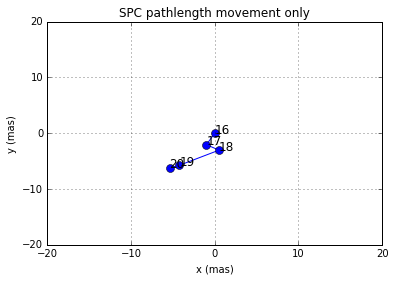

In [94]:
# plot one test: SPC pathlength movement

mas_x1_rel_baseline = np.subtract(hysteresis_test["mas_x1"][16:21],hysteresis_test["mas_x1"][16]).values
mas_y1_rel_baseline = np.subtract(hysteresis_test["mas_y1"][16:21],hysteresis_test["mas_y1"][16]).values

#mas_x1_rel_expected = [0,500,0,0]
#mas_y1_rel_expected = [0,0,0,-100]

text_array_emp = [16,17,18,19,20]
#text_array_expect = ["12,14,16","13","","15"]
plt.plot(mas_x1_rel_baseline, mas_y1_rel_baseline, '-o', markersize = 8, alpha = 1)
#plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, color="k", alpha = 0.6)
for i in range(0,5):
    plt.text(mas_x1_rel_baseline[i], mas_y1_rel_baseline[i],
             str(text_array_emp[i]), color="k", fontsize=12)
#for i in range(0,3):
#    plt.text(mas_x1_rel_expected[i]+5, mas_y1_rel_expected[i]+5,
#             str(text_array_expect[i]), color="k", fontsize=12, alpha = 0.6)
major_ticks = np.arange(-200, 401, 10)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.grid(True)
#plt.axis("equal")
plt.xlabel("x (mas)")
plt.ylabel("y (mas)")
plt.title("SPC pathlength movement only")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()

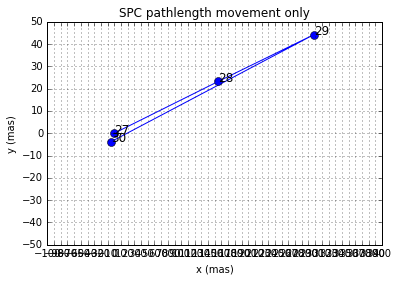

In [100]:
# plot one test: SPC pathlength movement

mas_x1_rel_baseline = np.subtract(hysteresis_test["mas_x1"][27:31],hysteresis_test["mas_x1"][27]).values
mas_y1_rel_baseline = np.subtract(hysteresis_test["mas_y1"][27:31],hysteresis_test["mas_y1"][27]).values

#mas_x1_rel_expected = [0,500,0,0]
#mas_y1_rel_expected = [0,0,0,-100]

text_array_emp = [27,28,29,30]
#text_array_expect = ["12,14,16","13","","15"]
plt.plot(mas_x1_rel_baseline, mas_y1_rel_baseline, '-o', markersize = 8, alpha = 1)
#plt.plot(mas_x1_rel_expected, mas_y1_rel_expected, '-o', markersize = 8, color="k", alpha = 0.6)
for i in range(0,4):
    plt.text(mas_x1_rel_baseline[i], mas_y1_rel_baseline[i],
             str(text_array_emp[i]), color="k", fontsize=12)
#for i in range(0,3):
#    plt.text(mas_x1_rel_expected[i]+5, mas_y1_rel_expected[i]+5,
#             str(text_array_expect[i]), color="k", fontsize=12, alpha = 0.6)
major_ticks = np.arange(-200, 401, 10)                                              
plt.xticks(major_ticks)                                                       
plt.yticks(major_ticks) 
plt.xlim([-100,400])
plt.ylim([-50,50])
plt.grid(True)
#plt.axis("equal")
plt.xlabel("x (mas)")
plt.ylabel("y (mas)")
plt.title("SPC pathlength movement only")
#plt.scatter(hysteresis_test["x2"],hysteresis_test["y2"])
plt.show()